# ***Simule el primer sistema cuántico descrito en la sección 4.1.***

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

In [5]:
import numpy as np

# Función para calcular la norma de un vector
def calcular_norma(vector):
    return np.linalg.norm(vector)

# Función para calcular la probabilidad de encontrar la partícula en una posición dada
def probabilidad_en_posicion(estado_cuantico, posicion):
    numerador = calcular_norma(estado_cuantico[posicion]) ** 2
    denominador = calcular_norma(estado_cuantico) ** 2
    return numerador / denominador

def main():
    # Vector 
    estado_cuantico = np.array([[8-3j], [5+1j], [3-2j], [6+7j],[5-3j],[1+3j],[5+3j]])

    # Calcular la probabilidad en la posición 6
    probabilidad = probabilidad_en_posicion(estado_cuantico, 6)
    print("La probabilidad de encontrar la partícula en la posición dada es:", probabilidad)

main()

La probabilidad de encontrar la partícula en la posición dada es: 0.12363636363636361


2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

In [1]:
import numpy as np

def vector_norm(vec):
    """Calcula la norma de un vector."""
    return np.linalg.norm(vec)

def conjugate_transpose(vec):
    """Devuelve el conjugado del transpuesto de un vector."""
    return np.conjugate(vec.T)

def transition_probability(state_a, state_b):
    """Calcula la probabilidad de transición entre dos estados."""
    bra_b = conjugate_transpose(state_b)
    norm_a = vector_norm(state_a)
    norm_b = vector_norm(state_b)
    
    # Probabilidad de transición
    prob_amplitude = np.dot(bra_b, state_a)[0][0]  # Solo el primer elemento
    probability = np.abs(prob_amplitude) ** 2 / (norm_a * norm_b) ** 2
    return probability

def main():
    vector_a = np.array([[2 + 4j], [0 + 2j]])
    vector_b = np.array([[9 + 2j], [4 - 6j]])
    transition_prob = transition_probability(vector_a, vector_b)
    print(f"La probabilidad de transitar del vector {vector_a.flatten()} al vector {vector_b.flatten()} es: {transition_prob}")

main()

La probabilidad de transitar del vector [2.+4.j 0.+2.j] al vector [9.+2.j 4.-6.j] es: 0.5462287104622872


# ***Complete los retos de programación del capítulo 4.***

**1. Amplitud de transición.**

El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observació

**Requisitos**:
- Recibir dos vectores ket.
- Calcular el producto interno entre ambos.
- Retornar la amplitud de transición.


In [1]:
import numpy as np

def amplitud_transicion(ket1, ket2):
    # Calcula el producto interno entre dos vectores ket
    return np.vdot(ket2, ket1)

ket1 = np.array([1+2j, 3+4j])
ket2 = np.array([0+1j, 1+0j])

amplitud = amplitud_transicion(ket1, ket2)
print("Amplitud de transición:", amplitud)

Amplitud de transición: (5+3j)


**2. la media y la varianza del observable en el estado dado.**

Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

**Requisitos**:
- Verificar si la matriz es hermitiana.
- Calcular la media y la varianza del observable en el estado cuántico.

In [2]:
import numpy as np

def es_hermitiana(matriz):
    # Verifica si la matriz es igual a su conjugada transpuesta
    return np.allclose(matriz, np.conjugate(matriz.T))

def media_varianza_observable(matriz, ket):
    if not es_hermitiana(matriz):
        raise ValueError("La matriz no es hermitiana.")
    
    # Calcular la media (valor esperado)
    media = np.vdot(ket, np.dot(matriz, ket))

    # Calcular la varianza
    A2 = np.dot(matriz, matriz)
    media_A2 = np.vdot(ket, np.dot(A2, ket))
    varianza = media_A2 - np.abs(media) ** 2

    return media, varianza

matriz = np.array([[1, 1j], [-1j, 2]])
ket = np.array([1+1j, 0+1j])

media, varianza = media_varianza_observable(matriz, ket)
print("Media:", media)
print("Varianza:", varianza)


Media: (2+0j)
Varianza: (-1+0j)


**3. calcula los valores propios del observable y la probabilidad**

El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

**Requisitos**:
- Comprobar que la matriz es hermitiana.
- Calcular los valores propios del observable.
- Calcular la probabilidad de que el sistema transite a cada vector propio usando la fórmula:
**P(∣ϕ⟩)=∣⟨ϕ∣ψ⟩∣^2**

In [3]:
import numpy as np

def valores_propios_probabilidad(matriz, ket):
    if not es_hermitiana(matriz):
        raise ValueError("La matriz no es hermitiana.")
    
    # Obtener los valores propios y los vectores propios
    valores_propios, vectores_propios = np.linalg.eigh(matriz)
    
    # Calcular las probabilidades de transición a los vectores propios
    probabilidades = []
    for vec_propio in vectores_propios.T:
        probabilidad = np.abs(np.vdot(vec_propio, ket)) ** 2
        probabilidades.append(probabilidad)
    
    return valores_propios, probabilidades

matriz = np.array([[1, 1j], [-1j, 2]])
ket = np.array([1+1j, 0+1j])

valores_propios, probabilidades = valores_propios_probabilidad(matriz, ket)
print("Valores propios:", valores_propios)
print("Probabilidades de transición:", probabilidades)


Valores propios: [0.38196601 2.61803399]
Probabilidades de transición: [np.float64(2.6180339887498945), np.float64(0.3819660112501051)]


**4. dinámica del sistema.**

Se considera la dinámica del sistema. Ahora con una serie de matrices ***Un*** el sistema calcula el estado final a partir de un estado inicial.

**Requisitos**:
- Recibir una serie de matrices ***Un*** ​ (que pueden ser unitarias).
- Aplicar las matrices al vector inicial secuencialmente.
- Retornar el estado final del sistema

In [5]:
import numpy as np

def dinamica_sistema(matrices_U, estado_inicial):
    estado_final = estado_inicial
    for U in matrices_U:
        estado_final = np.dot(U, estado_final)
    return estado_final

U1 = np.array([[0, 1], [1, 0]])  
U2 = np.array([[1, 0], [0, -1]])  
estado_inicial = np.array([1+0j, 0+1j])

matrices_U = [U1, U2]
estado_final = dinamica_sistema(matrices_U, estado_inicial)
print("Estado final:", estado_final)


Estado final: [ 0.+1.j -1.+0.j]


# ***Realice los siguientes problemas e incluyalos como ejemplos***

Modele en su librería los problemas

**4.3.1**

In [8]:
import numpy as np

# Definir el operador Pauli-X (S_x) y los estados de spin hacia arriba y hacia abajo
Sx = np.array([[0, 1],
               [1, 0]])

# Definir el estado de spin hacia arriba |↑⟩ y el estado de spin hacia abajo |↓⟩
spin_arriba = np.array([1, 0])
spin_abajo = np.array([0, 1])

# Aplicar S_x al estado de spin hacia arriba para obtener el nuevo estado
nuevo_estado = np.dot(Sx, spin_arriba)

# Calcular las probabilidades de colapsar en los estados de spin hacia arriba o hacia abajo después de la medición
prob_spin_arriba = np.abs(np.dot(spin_arriba.conj(), nuevo_estado))**2
prob_spin_abajo = np.abs(np.dot(spin_abajo.conj(), nuevo_estado))**2

# Mostrar el nuevo estado y las probabilidades de colapsar en cada estado
nuevo_estado, prob_spin_arriba, prob_spin_abajo


(array([0, 1]), np.int64(0), np.int64(1))

**4.3.2**

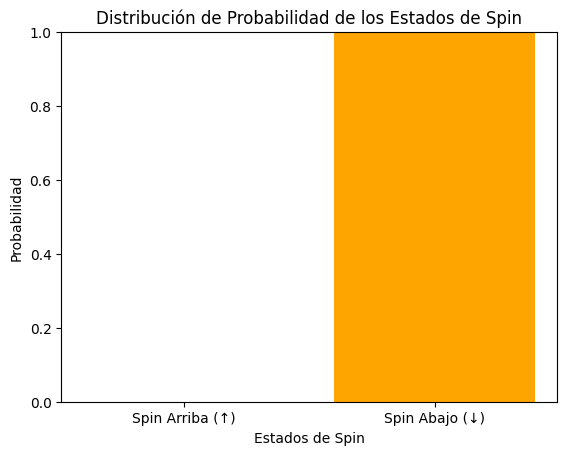

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el operador Pauli-X (S_x) y los estados de spin hacia arriba y hacia abajo
Sx = np.array([[0, 1],
               [1, 0]])

# Definir el estado de spin hacia arriba |↑⟩ y el estado de spin hacia abajo |↓⟩
spin_arriba = np.array([1, 0])
spin_abajo = np.array([0, 1])

# Aplicar S_x al estado de spin hacia arriba para obtener el nuevo estado
nuevo_estado = np.dot(Sx, spin_arriba)

# Calcular las probabilidades de colapsar en los estados de spin hacia arriba o hacia abajo después de la medición
prob_spin_arriba = np.abs(np.dot(spin_arriba.conj(), nuevo_estado))**2
prob_spin_abajo = np.abs(np.dot(spin_abajo.conj(), nuevo_estado))**2

# Definir los valores propios (eigenvalues) asociados con los estados de spin
eigenvalues = ['Spin Arriba (↑)', 'Spin Abajo (↓)']
probabilidades = [prob_spin_arriba, prob_spin_abajo]

# Graficar la distribución de probabilidad
plt.bar(eigenvalues, probabilidades, color=['blue', 'orange'])
plt.title('Distribución de Probabilidad de los Estados de Spin')
plt.xlabel('Estados de Spin')
plt.ylabel('Probabilidad')
plt.ylim(0, 1)  # Asegurar que el eje y vaya de 0 a 1 para mostrar probabilidades correctamente
plt.show()


**4.4.1**

In [9]:
import numpy as np

# Definir las matrices U1 y U2
U1 = np.array([[0, 1],
               [1, 0]])

U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2],
               [np.sqrt(2)/2, -np.sqrt(2)/2]])

# Verificar que U1 y U2 son unitarias
U1_dagger = U1.conj().T  # Conjugada transpuesta de U1
U2_dagger = U2.conj().T  # Conjugada transpuesta de U2

# Producto U1 * U1_dagger y U2 * U2_dagger
is_U1_unitary = np.allclose(np.dot(U1_dagger, U1), np.eye(2))
is_U2_unitary = np.allclose(np.dot(U2_dagger, U2), np.eye(2))

# Producto de U1 y U2
U_product = np.dot(U1, U2)

# Verificar si el producto U1 * U2 es unitario
U_product_dagger = U_product.conj().T
is_product_unitary = np.allclose(np.dot(U_product_dagger, U_product), np.eye(2))

is_U1_unitary, is_U2_unitary, is_product_unitary


(True, True, True)

**4.4.2**

In [12]:
import numpy as np

# Definir la matriz unitaria U
U = np.array([[0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
              [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
              [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
              [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]])

# Estado inicial del sistema
psi_initial = np.array([1, 0, 0, 0])

# Aplicar U tres veces al estado inicial
psi_after_1 = np.dot(U, psi_initial)
psi_after_2 = np.dot(U, psi_after_1)
psi_after_3 = np.dot(U, psi_after_2)

# Calcular la probabilidad de encontrar la partícula en el punto 3
# La probabilidad es el valor absoluto al cuadrado del tercer elemento del estado resultante
probability_point_3 = np.abs(psi_after_3[2])**2

psi_after_3, probability_point_3


(array([ 0.        +0.j        , -0.70710678+0.70710678j,
         0.        +0.j        ,  0.        +0.j        ]),
 np.float64(0.0))